# Import Library

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [496]:
# path dataset obesitas
obesDfPath = 'data/ObesityDataSet_cleaned_and_data_sinthetic.csv'
obesDf = pd.read_csv(obesDfPath)

In [497]:
# tinjau dataset obesitas
obesDf.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


# Data Assessing

In [498]:
# Cek shape dataset obesitas
obesDf.shape

(2111, 19)

## Penilaian Tiap Dataset

### Penilaian Dataset Obesitas


In [499]:
obesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

Cek data null

In [500]:
obesDf.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

Cek data duplikat

In [501]:
obesDf.duplicated().sum()

0

In [502]:
obesDf.describe()

,Age,Height,Weight,NCP,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.588820,2.687826,29.700159
std,6.357078,0.093305,26.188572,0.809680,8.011337
min,14.000000,1.450000,39.000000,1.000000,12.998685
25%,20.000000,1.630000,65.500000,3.000000,24.325802
50%,23.000000,1.700499,83.000000,3.000000,28.719089
75%,26.000000,1.768464,107.000000,3.000000,36.016501
max,61.000000,1.980000,173.000000,4.000000,50.811753


Dari hasil di atas, bahwa pada dataset obesitas:
- Tidak ada nilai null
- Tidak ada nilai duplikat

Catatan:
Terdapat kesalahan tipe data ada kolom Weight, perlu perubahan dari tipe data integer menjadi float

# Data Cleaning

## Mengubah Tipe Data Kolom Weight pada Dataset Obesitas

In [503]:
obesDf['Weight'] = obesDf.Weight.astype(float)

In [504]:
obesDf.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64.0,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56.0,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77.0,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87.0,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90.0,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


# Exploratory Data Analysis

In [505]:
obesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

## Deskripsi Variabel - Dataset Obesitas
1. Id: Kolom index
2. BMI (*Body Mass Index*): Indeks masa tubuh ideal (target)
3. Gender: Jenis Kelamin 
4. Age: Umur
5. Height: Tinggi badan (inch)
6. Weight: Berat badan (kg)
7. family_history_with_overweight: Riwayat keluarga dengan berat badan berlebih (obesitas)
8. FAVC: Frekuensi mengkonsumsi makanan tinggi kalori
9.  FCVC: Frekuensi mengkonsumsi sayur-mayur
10. NCP: Jumlah makan pokok perhari
11. CAEC: Frekuensi makan cemilan
12. SMOKE: Kebiasaan merokok
13. CH2O: Jumlah minum air
14. SCC: Kebiasaan monitoring konsumsi kalori
15. FAF: Frekuensi kegiatan fisik
16. TUE: Waktu penggunaan perangkat (jam)
17. CALC: Frekuensi mengkonsumsi alkohol
18. MTRANS: Kategori transportasi yang digunakan
19. NObeyesdad: Kategori berat badan

Untuk uraian lebih lanjut adalah sebagai berikut:
- Terdapat 14 kolom dengan tipe data object, yaitu Id, Gender, family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
- Terdapat 2 kolom dengan tipe data integer, yaitu Age dan NCP
- Terdapat 3 kolom dengan tipe data float, Height, Weight, dan BMI

## Pencarian Missing Value - Dataset Obesitas


Pada kasus dataset ini, saya hanya akan mengambil kolom yang akan digunakan pada model Machine Learning nantinya. Dengan tujuan untuk memprediksi berapa besar BMI (*Body Mass Index*) dari perhitungan tinggi badan (Height), dan berat badan (Weight).

## Menghapus Kolom yang Tidak Perlu

In [506]:
# Mengambil hanya kolom yang digunakan
obesDf = obesDf[['Height', 'Weight', 'BMI']]

obesDf.head()

,Height,Weight,BMI
0,1.62,64.0,24.386526
1,1.52,56.0,24.238227
2,1.80,77.0,23.765432
3,1.80,87.0,26.851852
4,1.78,90.0,28.342381


In [507]:
# Cek Shape
obesDf.shape

(2111, 3)

## Cek Missing Value Kolom Numerik

### 1. Kolom Height

In [508]:
heightZero = (obesDf.Height == 0).sum()
print(heightZero)

0


### 2. Kolom Weight

In [509]:
weightZero = (obesDf.Weight == 0).sum()
print(weightZero)

0


### 4. Kolom BMI

In [510]:
zeroBMI = (obesDf.BMI == 0).sum()

print(zeroBMI)

0


Kesimpulan yang didapatkan adalah: 

- **tidak ada *missing value*** pada kolom numerik di dataset. 

## Cek Outliers

In [511]:
obesDf.shape

(2111, 3)

### 1. Kolom Height

<Axes: xlabel='Height'>

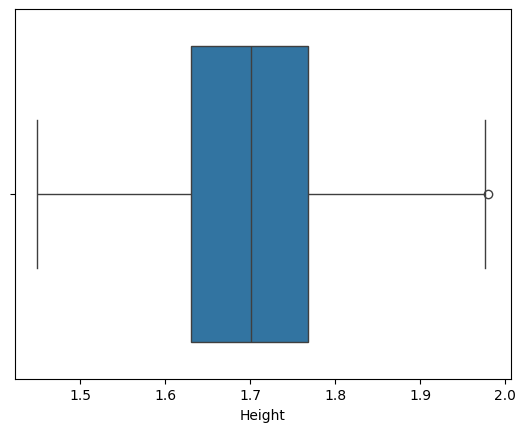

In [512]:
sns.boxplot(x=obesDf['Height'])

### 2. Kolom Weight

<Axes: xlabel='Weight'>

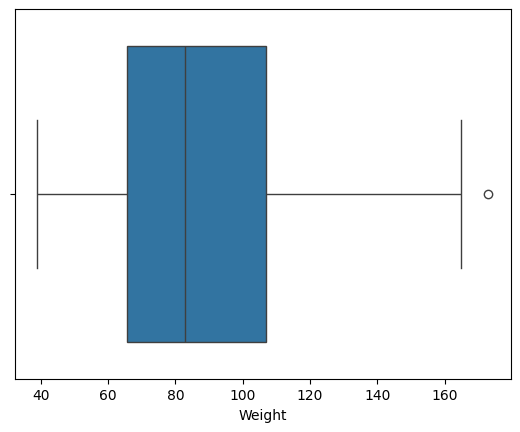

In [513]:
sns.boxplot(x=obesDf['Weight'])

### 3. Kolom BMI

<Axes: xlabel='BMI'>

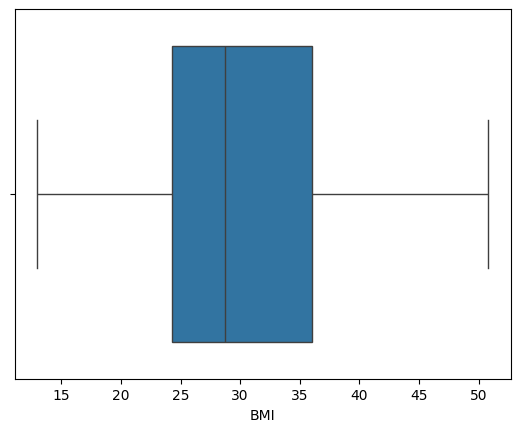

In [514]:
sns.boxplot(x=obesDf['BMI'])

Kesimpulan:

Terdapat data *outlier* pada :

1. Kolom Height 
2. Kolom Weight

## Penanganan Outlier

Penanganan pada data-data outliers yang terdeteksi, saya menggunakan metode *Inter Quartile Range* (IQR) untuk mengeliminasinya.

In [515]:
# Cek shape data awal
obesDf.shape

(2111, 3)

### Penerapan Rumus IQR

In [516]:
# Mengambil kuartil 1 dari keseluruhan data
q1 = obesDf.quantile(0.25)
# Mengambil kuartil 3 dari keseluruhan data
q3 = obesDf.quantile(0.75)

# Mengurangkan antara kuartil 1 dan 3
iqr = q3 - q1

# Menerapkan rumus IQR
obesDf = obesDf[~((obesDf < (q1 - 1.5 * iqr)) | (obesDf > (q3 + 1.5 * iqr))).any(axis=1)]


## Pengecekan Outliers Lanjut

### 1. Kolom Weight

<Axes: xlabel='Weight'>

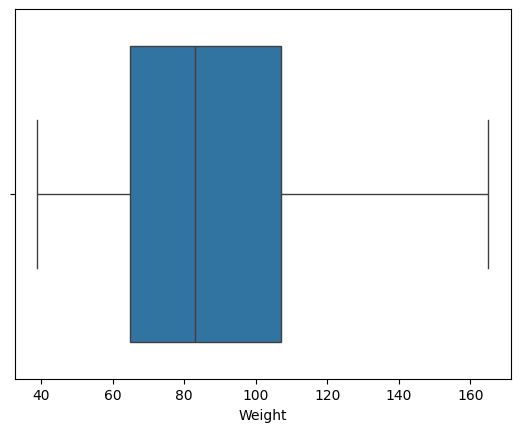

In [517]:
sns.boxplot(x=obesDf['Weight'])

### 2. Kolom Height

<Axes: xlabel='Height'>

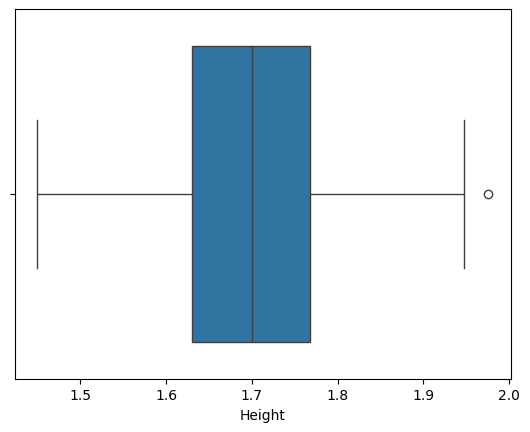

In [518]:
sns.boxplot(x=obesDf['Height'])

### 3. Kolom BMI

<Axes: xlabel='BMI'>

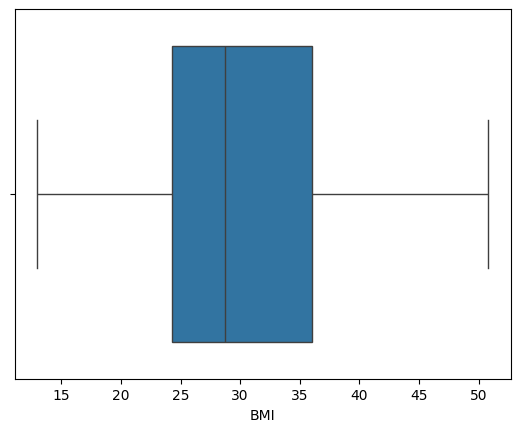

In [519]:
sns.boxplot(x=obesDf['BMI'])

Kesimpulan:

Dari hasil penerapan penghapusan outliers di atas, dapat dilihat bahwa masih terdeteksi outlier pada kolom *Height*. Jadi diperlukan analisis lebih lanjut yaitu mencari data tersebut agar dapat mengambil langkah yang tepat

### Mencari Data Outlier yang Tersisa

Dikarenakan tersisa hanya 1 data outlier, maka saya melakukan pengecekan data maksimal. Sebab kondisi disini data outlier berada pada urutan terakhir, yang mana itu merupakan nilai maksimum.

In [520]:
obesDf.Height.max()

1.975663

### Menjalankan Rumus IQR Lagi

In [521]:
# Mengambil kuartil 1 dari keseluruhan data
q1 = obesDf.quantile(0.25)
# Mengambil kuartil 3 dari keseluruhan data
q3 = obesDf.quantile(0.75)

# Mengurangkan antara kuartil 1 dan 3
iqr = q3 - q1

# Menerapkan rumus IQR
obesDf = obesDf[~((obesDf < (q1 - 1.5 * iqr)) | (obesDf > (q3 + 1.5 * iqr))).any(axis=1)]

In [522]:
obesDf.Height.max()

1.947406

### Pengecekan Outliers dengan Boxplot pada Kolom Height

<Axes: xlabel='Height'>

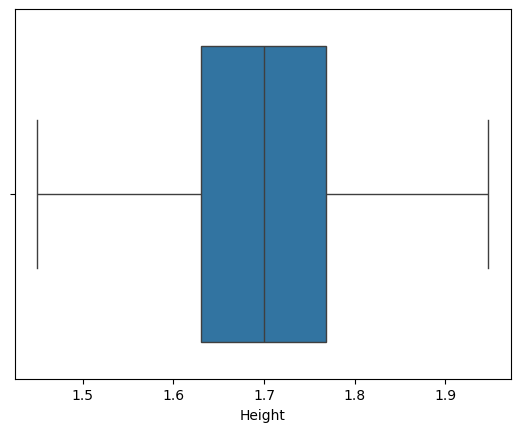

In [523]:
sns.boxplot(x=obesDf['Height'])

In [524]:
# Cek Shape
obesDf.shape

(2108, 3)

Setelah melakukan beberapa langkah di atas, data sudah tidak terdapat outliers lagi dan siap untuk dilakukan analisis lebih lanjut.